In [1]:
# TO RUN IT: CHANGE MY PATH
%matplotlib inline
%load_ext autoreload
%autoreload 2

# change path if necessary
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# imports
import numpy as np 
import matplotlib.pyplot as plt

from proj1_helpers import predict_labels 
from implementations import *
from labels import idx_2labels
from costs import *
from optimize_hyperparams import *
from cross_validation import *
from step_wise import *

# Build dataset

In [2]:
from proj1_helpers import load_csv_data 

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

In [3]:
from outliers import handle_outliers

# handle outliers
X0, y = handle_outliers(input_data_raw, y_raw, -999, 'median')

-999 are replaced by the median value of the feature


In [4]:
from standard import standardize

# standardize
X0, mean_X0, std_X0 = standardize(X0)

# set y in {0,1} instead of {-1,1}
y[np.where(y==-1)]=0

# Logistic Regression (no penalization)

In [9]:
# model parameters
model = dict()
model['method'] = 'lr' # 'lrr' if regularized with a penalization 'lambda_' otherwise 'lr' 
model['loss'] = 'loglikelihood'

# model hyperparameter
model['gamma'] = 1e-5

# other
model['method_minimization'] = 'gd' # 'gd' (gradient_descent) or 'newton' (newton descent leads to non invertible matrice "S" which is too big)
model['threshold'] = 1
model['max_iters'] = 10000
model['debug_mode'] = 1

# R2 type
R2_method = 'McFadden' # 'loss', 'Tjur' or 'McFadden' 

# estimate R2 error through cross validation (1 or 0)
cv = 1
model['k_fold'] = 2

In [10]:
# step wise candidates
all_candidates = X0

# get feature names 
all_features = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])

# list of feature names and indices
features = []
for i in range(len(all_features)):
    features.append((i,all_features[i]))

--------------------- final iteration


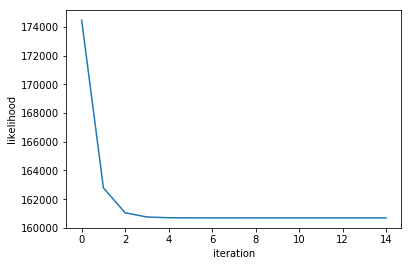

KeyError: 'initial_w'

In [11]:
# step-wise
best_R2adj, idx_features = stepwise(model, R2_method, all_candidates, features, y, cv)

In [ ]:
# display selected features
results_r2_stepwise(best_R2adj[:len(best_R2adj)-1], idx_features)